In [3]:
#Import libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.util import ngrams

import string
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import gensim
from gensim.models import Word2Vec

from wordcloud import WordCloud, STOPWORDS

np.random.seed(0)

%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/filipszafranski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/filipszafranski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df_counts = pd.read_csv('data/tweet_counts.csv')  
df_counts.head()

,start,end,count
0,2022-01-22T00:09:51.000Z,2022-01-22T01:00:00.000Z,16166
1,2022-01-22T01:00:00.000Z,2022-01-22T02:00:00.000Z,18475
2,2022-01-22T02:00:00.000Z,2022-01-22T03:00:00.000Z,16978
3,2022-01-22T03:00:00.000Z,2022-01-22T04:00:00.000Z,16762
4,2022-01-22T04:00:00.000Z,2022-01-22T05:00:00.000Z,16834


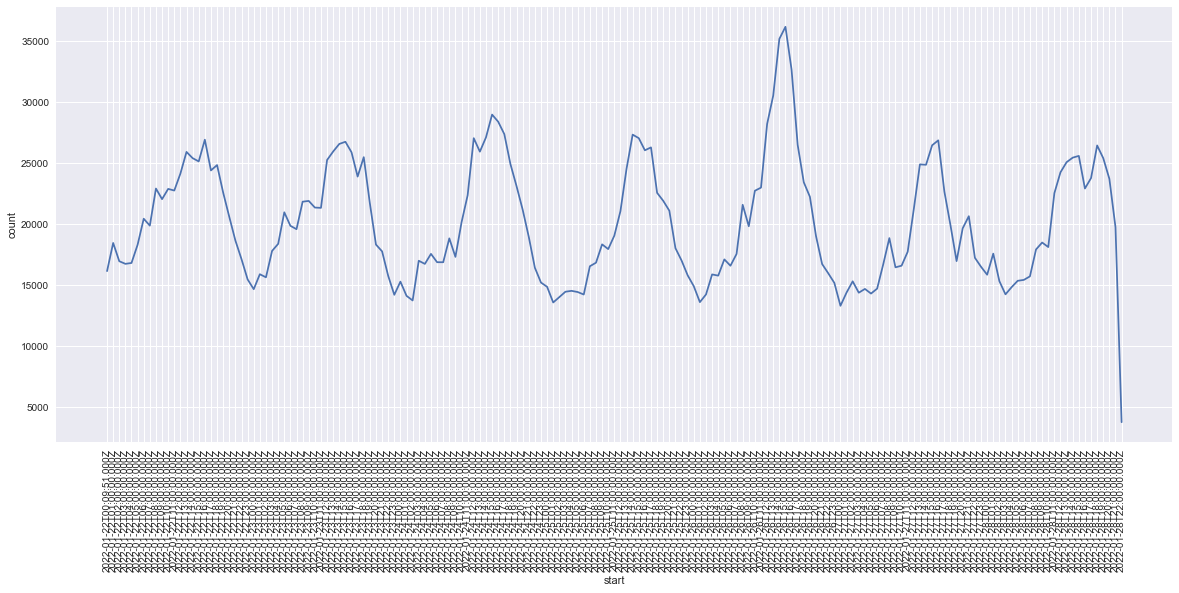

In [13]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=df_counts, x="start", y="count")
ax.tick_params(axis='x', rotation=90);

In [17]:
df_btc_usd = pd.read_csv('data/btc_usd_hourly.csv', )  
df_btc_usd.head()

,time,high,low,open,volumefrom,volumeto,close
0,2022-01-21 07:00:00,39173.58,38575.80,38697.49,1758.17,68334552.69,39142.31
1,2022-01-21 08:00:00,39294.17,39030.88,39142.31,1288.39,50434328.22,39170.84
2,2022-01-21 09:00:00,39191.28,38953.29,39170.84,1549.57,60508276.18,38980.45
3,2022-01-21 10:00:00,39090.91,38878.86,38980.45,1272.89,49626815.02,38981.85
4,2022-01-21 11:00:00,38986.50,38694.25,38981.85,1454.38,56453857.47,38901.98


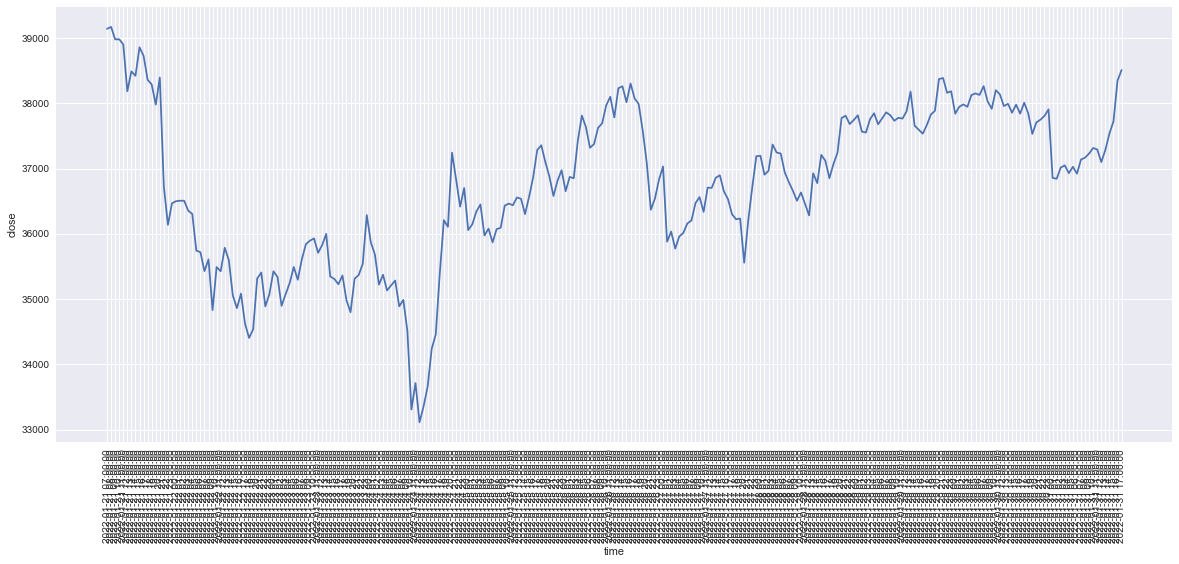

In [18]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=df_btc_usd, x="time", y="close")
ax.tick_params(axis='x', rotation=90);

In [9]:
df_tweet_data = pd.read_csv('data/tweet_data.csv')  
df_tweet_data.head()

,tweet_id,author_id,created_at,source,retweet_count,reply_count,like_count,text
0,1487185499915706371,613649581,2022-01-28 22:07:08+00:00,Twitter Web App,0,2,2,@FamiLee_Farm @0xBingBong I first dissented in...
1,1487185295757905920,19721574,2022-01-28 22:06:19+00:00,Twitter for iPhone,22,7,105,A disaster.\n\nThe sooner aid agencies worldwi...
2,1487184488719269890,21230289,2022-01-28 22:03:07+00:00,Twitter Web App,17,7,40,With the very real threat of the government tr...
3,1487184473670180870,970207298,2022-01-28 22:03:03+00:00,Twitter Web App,192,233,886,Bitcoin mining's energy use has more than trip...
4,1487184321022767115,3367334171,2022-01-28 22:02:27+00:00,Zapier.com,21,11,49,Tori Zero NFT Project Launched a Joint Coopera...
